<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Librarys" data-toc-modified-id="Importing-Librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Librarys</a></span></li><li><span><a href="#Creating-Data-loader" data-toc-modified-id="Creating-Data-loader-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating Data loader</a></span></li><li><span><a href="#test" data-toc-modified-id="test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>test</a></span></li></ul></div>

##  Importing Librarys

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from glob import glob

## Creating Data loader

In [11]:
os.getcwd()

'C:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision'

In [14]:
folders = os.listdir('c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1')

In [47]:
for i,j in enumerate(folders):
    print('{j} folder is lebel {i}'.format(i=i, j=j))

n01440764 folder is lebel 0
n01443537 folder is lebel 1
n01484850 folder is lebel 2
n01491361 folder is lebel 3
n01494475 folder is lebel 4
n01496331 folder is lebel 5


In [20]:
datat = np.sort(np.array(glob('./Dataset/Assignment1/*')))    
len(datat)

6

In [24]:
def all_train_dir(datat):
    kw = list()
    kb = list()

    for j in range(len(datat)//1):
        v1 = np.sort(np.array(glob(datat[j]+'/*')))
        random.shuffle(v1)

        for i in range(len(v1)//1):

            kw.append(v1[i])
            kb.append(j)

    return np.array(kw),np.array(kb)

In [25]:
tdr1, tdr2 = all_train_dir(datat)

In [29]:
tdr1

array(['./Dataset/Assignment1\\n01440764\\n01440764_239.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_172.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_137.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_63.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_39.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_200.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_44.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_292.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_334.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_315.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_188.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_18.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_141.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_148.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_78.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_37.JPEG'

In [27]:
len(tdr1)

180

In [28]:
tdr2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])

In [30]:
tdr1[0]

'./Dataset/Assignment1\\n01440764\\n01440764_239.JPEG'

In [38]:
from skimage import io

image = io.imread(tdr1[0])
type(image)

numpy.ndarray

In [39]:
image.shape

(189, 250, 3)

0


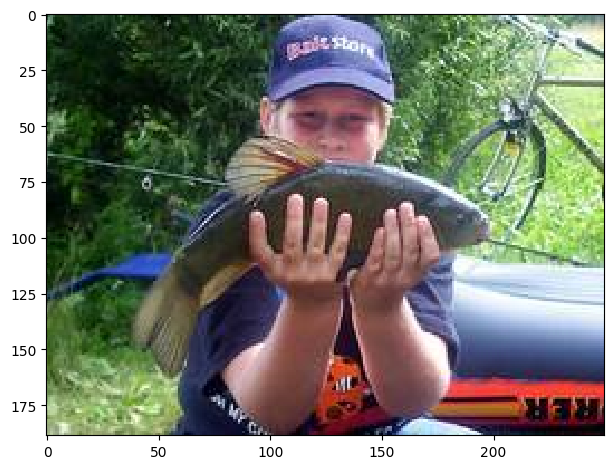

In [42]:
io.imshow(image)
print(tdr2[0])

./Dataset/Assignment1\n01484850\n01484850_95.JPEG
2


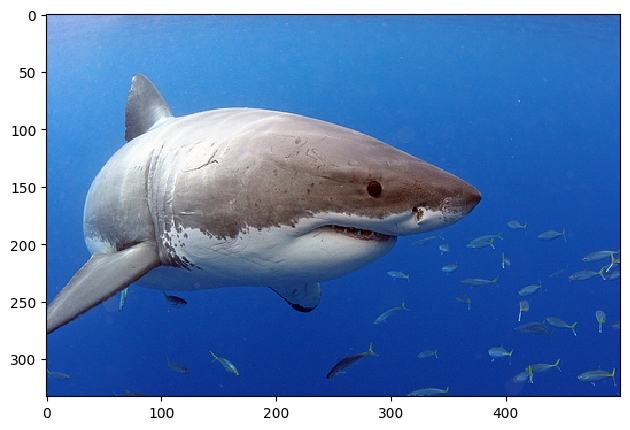

In [44]:
print(tdr1[65])
image = io.imread(tdr1[65])
io.imshow(image)
print(tdr2[65])